In [1]:
import torch
import torchvision
import torchvision.datasets as datasets
import torch.nn as nn
import torch.optim as optim
torch.random.seed = 42

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Load the MNIST dataset

In [2]:
mnist_trainset = datasets.MNIST(root='../data', train=True, download=True,
                                transform=None)

mnist_testset = datasets.MNIST(root='../data', train=False, download=True,
                               transform=None)

In [3]:
print(mnist_trainset)
print('')
print(mnist_testset)

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: ../data
    Transforms (if any): None
    Target Transforms (if any): None

Dataset MNIST
    Number of datapoints: 10000
    Split: test
    Root Location: ../data
    Transforms (if any): None
    Target Transforms (if any): None


In [4]:
mnist_trainset.data[0].size()

torch.Size([28, 28])

In [5]:
size_len = mnist_trainset.data[0].size()[0]

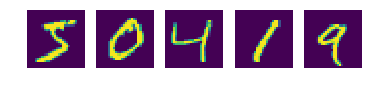

In [6]:
fig = plt.figure(1)
for i, img in enumerate(mnist_trainset.data[0:5]):
    ax = fig.add_subplot(1,5,i+1)
    ax.set_axis_off()
    ax = plt.imshow(img)
plt.show()

## Net architecture and train/test routines

In [7]:
class Net(nn.Module):
    """MLP with 3 ReLU hidden layers and 1 softmax output layer"""
    
    def __init__(self, H, C):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(size_len*size_len, H)
        self.fc2 = nn.Linear(H, H)
        self.fc3 = nn.Linear(H, H)
        self.fc4 = nn.Linear(H, C)
        self.relu = nn.ReLU()
        self.softmax = nn.LogSoftmax(dim=1)
        
    def forward(self, x):
        x = x.view(-1, size_len*size_len)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.softmax(self.fc4(x))
        return x

In [8]:
def train(model, x_train, y_train, optimizer, criterion, epoch, disp=''):
    model.train()
    
    optimizer.zero_grad()
    output = model(x_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    
    if disp=='print':
        print("Train Epoch: {}\tLoss: {:.6f}".format(epoch, loss.item()))
    elif disp=='graph':
        pass
        

In [9]:
def test(model, x_test, y_test, criterion, disp=''):
    model.eval()

    with torch.no_grad():
        output = model(x_test)
        test_loss = criterion(output, y_test)

    if disp=='print':
        print("\nTest set: Average loss: {:.4f}\n".format(test_loss))
    elif disp=='graph':
        pass


## Training

In [10]:
X_train = mnist_trainset.data.float()
y_train = mnist_trainset.targets

X_test = mnist_testset.data.float()
y_test = mnist_testset.targets

In [11]:
model = Net(100, 10)
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=100, bias=True)
  (fc4): Linear(in_features=100, out_features=10, bias=True)
  (relu): ReLU()
  (softmax): LogSoftmax()
)


In [12]:
alpha = 0.006
gamma = 10
max_epoch = 100
optimizer = optim.SGD(model.parameters(), lr=alpha)
criterion = torch.nn.NLLLoss()

In [13]:
epoch = count = 0

In [14]:
for epoch in range(1000):
    train(model, X_train, y_train, optimizer, criterion, epoch, 'print')
#    test(model, X_test, y_test, criterion, 'print')

Train Epoch: 0	Loss: 4.391118
Train Epoch: 1	Loss: 4.260060
Train Epoch: 2	Loss: 3.790262
Train Epoch: 3	Loss: 2.499252
Train Epoch: 4	Loss: 1.925754
Train Epoch: 5	Loss: 1.703450
Train Epoch: 6	Loss: 1.556812
Train Epoch: 7	Loss: 1.427120
Train Epoch: 8	Loss: 1.307750
Train Epoch: 9	Loss: 1.198856
Train Epoch: 10	Loss: 1.102863
Train Epoch: 11	Loss: 1.021212
Train Epoch: 12	Loss: 0.952294
Train Epoch: 13	Loss: 0.894315
Train Epoch: 14	Loss: 0.845208
Train Epoch: 15	Loss: 0.803080
Train Epoch: 16	Loss: 0.766598
Train Epoch: 17	Loss: 0.734833
Train Epoch: 18	Loss: 0.706904
Train Epoch: 19	Loss: 0.682151
Train Epoch: 20	Loss: 0.660052
Train Epoch: 21	Loss: 0.640175
Train Epoch: 22	Loss: 0.622220
Train Epoch: 23	Loss: 0.605932
Train Epoch: 24	Loss: 0.591040
Train Epoch: 25	Loss: 0.577365
Train Epoch: 26	Loss: 0.564783
Train Epoch: 27	Loss: 0.553130
Train Epoch: 28	Loss: 0.542316
Train Epoch: 29	Loss: 0.532247
Train Epoch: 30	Loss: 0.522840
Train Epoch: 31	Loss: 0.514046
Train Epoch: 32	Lo

Train Epoch: 260	Loss: 0.193951
Train Epoch: 261	Loss: 0.193592
Train Epoch: 262	Loss: 0.193236
Train Epoch: 263	Loss: 0.192880
Train Epoch: 264	Loss: 0.192527
Train Epoch: 265	Loss: 0.192176
Train Epoch: 266	Loss: 0.191828
Train Epoch: 267	Loss: 0.191480
Train Epoch: 268	Loss: 0.191135
Train Epoch: 269	Loss: 0.190792
Train Epoch: 270	Loss: 0.190452
Train Epoch: 271	Loss: 0.190111
Train Epoch: 272	Loss: 0.189773
Train Epoch: 273	Loss: 0.189436
Train Epoch: 274	Loss: 0.189101
Train Epoch: 275	Loss: 0.188770
Train Epoch: 276	Loss: 0.188438
Train Epoch: 277	Loss: 0.188108
Train Epoch: 278	Loss: 0.187780
Train Epoch: 279	Loss: 0.187453
Train Epoch: 280	Loss: 0.187128
Train Epoch: 281	Loss: 0.186805
Train Epoch: 282	Loss: 0.186482
Train Epoch: 283	Loss: 0.186162
Train Epoch: 284	Loss: 0.185844
Train Epoch: 285	Loss: 0.185526
Train Epoch: 286	Loss: 0.185209
Train Epoch: 287	Loss: 0.184896
Train Epoch: 288	Loss: 0.184584
Train Epoch: 289	Loss: 0.184273
Train Epoch: 290	Loss: 0.183963
Train Ep

Train Epoch: 517	Loss: 0.136246
Train Epoch: 518	Loss: 0.136100
Train Epoch: 519	Loss: 0.135954
Train Epoch: 520	Loss: 0.135810
Train Epoch: 521	Loss: 0.135665
Train Epoch: 522	Loss: 0.135519
Train Epoch: 523	Loss: 0.135376
Train Epoch: 524	Loss: 0.135231
Train Epoch: 525	Loss: 0.135088
Train Epoch: 526	Loss: 0.134945
Train Epoch: 527	Loss: 0.134803
Train Epoch: 528	Loss: 0.134660
Train Epoch: 529	Loss: 0.134518
Train Epoch: 530	Loss: 0.134376
Train Epoch: 531	Loss: 0.134234
Train Epoch: 532	Loss: 0.134094
Train Epoch: 533	Loss: 0.133953
Train Epoch: 534	Loss: 0.133812
Train Epoch: 535	Loss: 0.133673
Train Epoch: 536	Loss: 0.133533
Train Epoch: 537	Loss: 0.133395
Train Epoch: 538	Loss: 0.133256
Train Epoch: 539	Loss: 0.133118
Train Epoch: 540	Loss: 0.132979
Train Epoch: 541	Loss: 0.132842
Train Epoch: 542	Loss: 0.132705
Train Epoch: 543	Loss: 0.132568
Train Epoch: 544	Loss: 0.132431
Train Epoch: 545	Loss: 0.132295
Train Epoch: 546	Loss: 0.132158
Train Epoch: 547	Loss: 0.132023
Train Ep

Train Epoch: 774	Loss: 0.107736
Train Epoch: 775	Loss: 0.107650
Train Epoch: 776	Loss: 0.107565
Train Epoch: 777	Loss: 0.107479
Train Epoch: 778	Loss: 0.107394
Train Epoch: 779	Loss: 0.107308
Train Epoch: 780	Loss: 0.107223
Train Epoch: 781	Loss: 0.107138
Train Epoch: 782	Loss: 0.107053
Train Epoch: 783	Loss: 0.106968
Train Epoch: 784	Loss: 0.106884
Train Epoch: 785	Loss: 0.106800
Train Epoch: 786	Loss: 0.106715
Train Epoch: 787	Loss: 0.106631
Train Epoch: 788	Loss: 0.106547
Train Epoch: 789	Loss: 0.106463
Train Epoch: 790	Loss: 0.106378
Train Epoch: 791	Loss: 0.106295
Train Epoch: 792	Loss: 0.106211
Train Epoch: 793	Loss: 0.106128
Train Epoch: 794	Loss: 0.106044
Train Epoch: 795	Loss: 0.105961
Train Epoch: 796	Loss: 0.105877
Train Epoch: 797	Loss: 0.105794
Train Epoch: 798	Loss: 0.105712
Train Epoch: 799	Loss: 0.105629
Train Epoch: 800	Loss: 0.105546
Train Epoch: 801	Loss: 0.105464
Train Epoch: 802	Loss: 0.105381
Train Epoch: 803	Loss: 0.105300
Train Epoch: 804	Loss: 0.105217
Train Ep

In [15]:
test(model, X_test, y_test, criterion, 'print')


Test set: Average loss: 0.1267

